In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Bước 1: Đọc dữ liệu, kiểm tra/định dạng thời gian

In [10]:
df = pd.read_csv('data/international-airline-passengers.csv', 
                 index_col='Month', parse_dates=['Month'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   passengers_in_thousands  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [12]:
df.head()

,passengers_in_thousands
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
# df.index = pd.to_datetime(df.index)
#freq = 'H', 'D', 'W', 'M', 'MS': Hour, Day, Week, Month, Calendar month begin
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

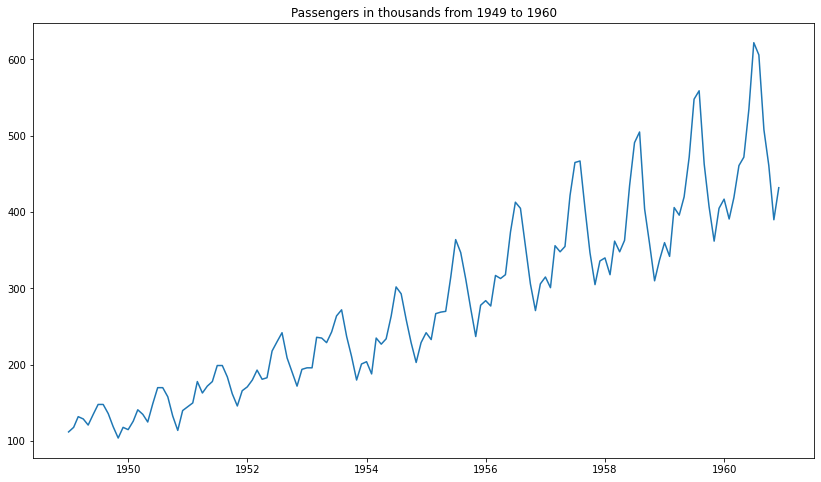

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(df)
plt.title('Passengers in thousands from 1949 to 1960')
plt.show()

### Decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
result = seasonal_decompose(df, model='multiplicative')
result

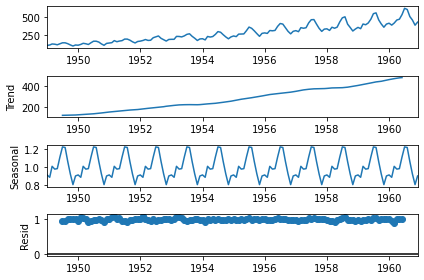

In [18]:
result.plot()
plt.show()

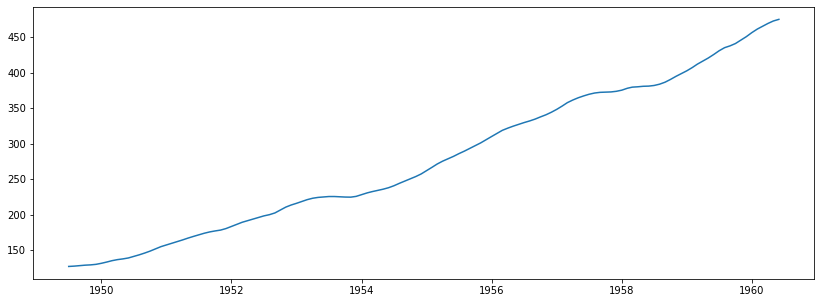

In [19]:
# xem xét yếu tố trend
plt.figure(figsize=(14, 5))
plt.plot(result.trend)
plt.show()

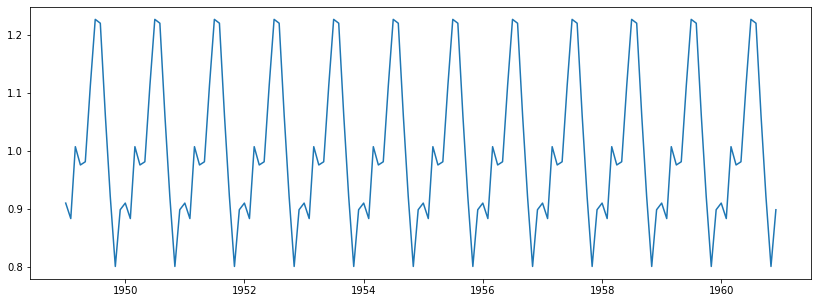

In [20]:
# xem xét yếu tố seasonal
plt.figure(figsize=(14, 5))
plt.plot(result.seasonal)
plt.show()

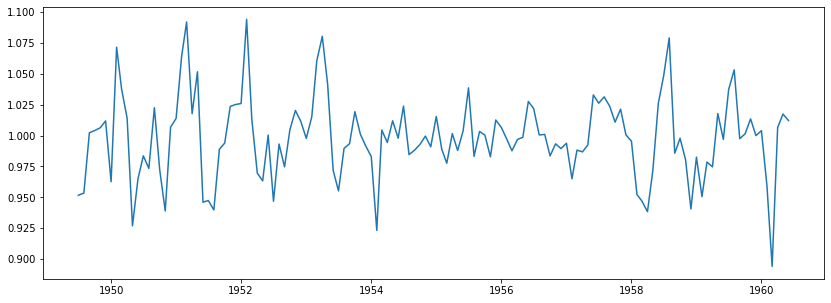

In [21]:
# xem xét yếu tố resid
plt.figure(figsize=(14, 5))
plt.plot(result.resid)
plt.show()

In [22]:
## nhận xét??

## áp dụng holt-winters để xây dựng mô hình

In [24]:
# chuẩn bị dữ liệu 
train = df.iloc[:120] # lấy 10 năm đầu tiên
test = df.iloc[120:] # lấy từ 01/2015 đến hết

In [25]:
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()

In [27]:
test.tail()

,passengers_in_thousands
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [29]:
pred = model.predict(start = test.index[0], end = test.index[-1])

In [28]:
test.index

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01',
               '1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq='MS')

## Bước 3 trực quan hóa dữ liệu

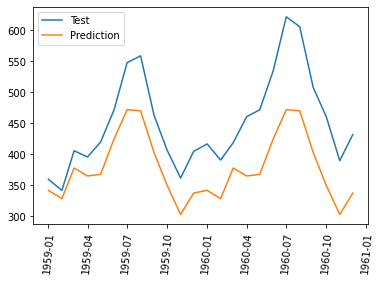

In [30]:
plt.plot(test, label='Test')
plt.plot(pred, label='Prediction')
# plt.plot(pred + mae, label='Prediction')
plt.xticks(rotation=85)
plt.legend()
plt.show()

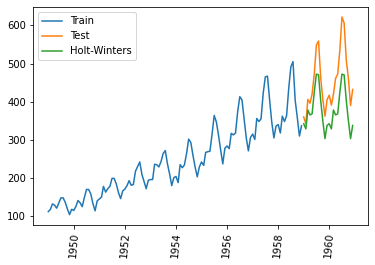

In [31]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Holt-Winters')
plt.xticks(rotation=85)
plt.legend()
plt.show()

## Dự đoán cho 12 tháng tiếp theo

In [32]:
import datetime as dt

In [33]:
start_date = dt.datetime(1961,1,1)
end_date = dt.datetime(1961,12,1)

In [34]:
pred_next_12 = model.predict(start=start_date,end=end_date)
pred_next_12

1961-01-01    342.226660
1961-02-01    328.733451
1961-03-01    378.168063
1961-04-01    365.344755
1961-05-01    367.948447
1961-06-01    425.102441
1961-07-01    472.261757
1961-08-01    470.383777
1961-09-01    403.019119
1961-10-01    350.236039
1961-11-01    303.290097
1961-12-01    337.704338
Freq: MS, dtype: float64

In [35]:
type(pred_next_12)

pandas.core.series.Series

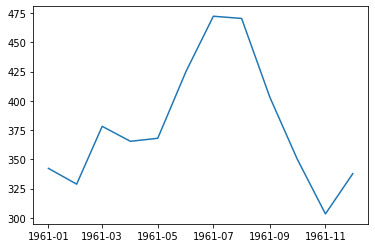

In [36]:
plt.plot(pred_next_12.index, pred_next_12.values)
plt.show()

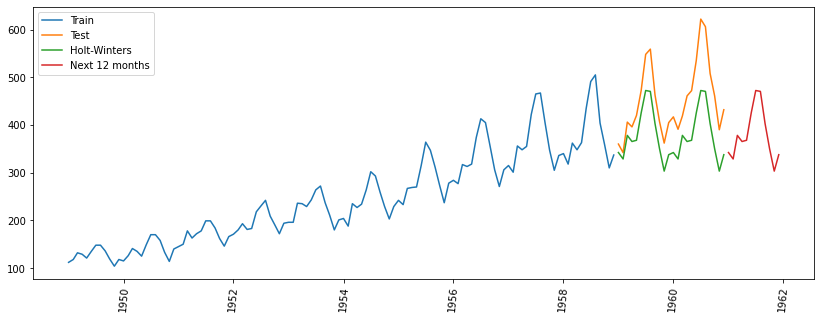

In [37]:
plt.figure(figsize=(14, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Holt-Winters')
plt.plot(pred_next_12, label='Next 12 months')
plt.xticks(rotation=85)
plt.legend()
plt.show()